1/1 [==============================] - 0s 167ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


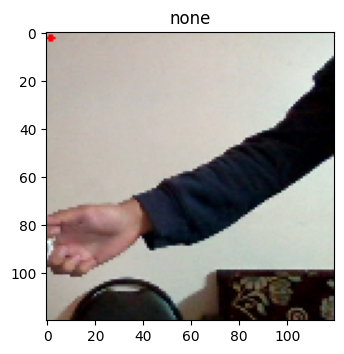

In [11]:
import tkinter as tk
from tkinter import*
from tensorflow.keras.models import load_model
from tkinter import filedialog as fd 
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np 
import cv2
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

classifier= load_model('ob_detection.h5')
objects = ['none', 'cup', 'keyboard', 'pen', 'notebook', 'phone']

 
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

def preprocess_image(file_path):
    test_images = tf.data.Dataset.list_files(file_path, shuffle=False)
    test_images = test_images.map(load_image)
    test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
    test_images = test_images.map(lambda x: x/255)

    image_generator = test_images.batch(1).as_numpy_iterator()
    return image_generator.next()


def classifiy(test_image_path):
    plot_image = preprocess_image(test_image_path)
    yhat = classifier.predict(plot_image)
    fig, ax = plt.subplots(figsize=(5,5))
    
    sample_image = np.squeeze(plot_image)
    sample_coords = yhat[1]

    cv2.rectangle(sample_image, 
                tuple(np.multiply(sample_coords[0][:2], [120,120]).astype(int)),
                tuple(np.multiply(sample_coords[0][2:], [120,120]).astype(int)), 
                        (255,0,0), 2)
        
    ax.set_title(objects[np.argmax(yhat[0])])
    ax.imshow(sample_image)
    return fig, yhat



root = Tk()
root.title('rbna y3deha 3la 5er')
root.geometry("400x400")


def callback():
    name= fd.askopenfilename() 
    return name
    
def button_function():
    f1 , yhat= classifiy(callback())
    chart_type = FigureCanvasTkAgg(f1, root)
    chart_type.get_tk_widget().pack()

errmsg = 'Error!'

tk.Button(text='Click to select an Image', 
       command=button_function).pack(fill=tk.X) 


root.mainloop()